In [9]:
import csv
import numpy as np

import matplotlib

#%matplotlib qt
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
#from mpl_toolkits.axes_grid1 import make_axes_locatable

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0) # bigger figure!

from scipy import stats
import pandas as pd
import json
import seaborn as sns

# raincloud plots: https://github.com/RainCloudPlots/RainCloudPlots
import ptitprince as pt
import copy

In [10]:
df=pd.read_csv("df.csv")
path = "../figs/"
#path = "/home/senft/thesis/sources/images/tutoring/"
saving = False
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)

def analyse_single(d,x,y,xlabel,ylabel,palette=["deepskyblue", "#F7C544", "#0AB234"],legend=False, with_stats=False,saving=False):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    #sns.violinplot(x=x, y=y, data=d, split=False, inner=None, palette=palette,ax=ax1)
    sns.boxplot(x=x, y=y, data=d, palette=palette,ax=ax1)
    sns.swarmplot(x=x, y=y, data=d, dodge=True, palette=["black", "black","black"],ax=ax1)

    ma=max(d[y].values)
    mi=min(d[y].values)
    if mi > 0 and mi < .2*ma:
        ax1.set_ylim(0,1.1*ma)
        ax2.set_ylim(0,1.1*ma)
    else:
        ax1.set_ylim(mi-.05*ma,1.05*ma)
        ax2.set_ylim(mi-.05*ma,1.05*ma)
    
    ax1.set_xlabel(xlabel, **font)
    ax1.set_ylabel("", **font)
    sns.pointplot(x=x, y=y, data=d, palette=palette,ax=ax2)
    #ax2.set_yticklabels(ax1.get_yticklabels())
    ax2.set_xlabel(xlabel, **font)
    ax2.set_ylabel(ylabel+"\n", **font)
    ax2.yaxis.tick_right()
    
    if legend:
        handles1, labels1 = ax1.get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()
        l = ax2.legend(handles1[0:3], labels2[0:3], loc='upper left',prop={'size': 13})
        ax1.legend_.remove()
    if saving:
        f.savefig(path+y+".pdf",bbox_inches="tight")
                    
def expend_frame(data,x,y,hue):
    col = [l for l in list(data) if y in l]
    d={x:[],y:[],hue:[]}
    for i,c in enumerate(col):
        d[x]=d[x]+ [str(i+1)] * len(data)
        d[y]=d[y]+data[c].tolist()
        d[hue]=d[hue]+data[hue].tolist()
    return pd.DataFrame(d)

def plot(d,x,y,hue,xlabel,ylabel,palette=["deepskyblue", "#F7C544", "#0AB234"],legend=True,saving=False,line=None):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    sns.violinplot(x=x, y=y, hue=hue, data=d, split=False, inner=None, palette=palette,ax=ax1)
    sns.swarmplot(x=x, y=y, hue=hue, data=d, dodge=True, palette=["black", "black","black"],ax=ax1)

    ma=max(d[y].values)
    mi=min(d[y].values)
    if mi > 0 and mi < .2*ma:
        ax1.set_ylim(0,1.1*ma)
        ax2.set_ylim(0,1.1*ma)
    else:
        ax1.set_ylim(mi-.05*ma,1.05*ma)
        ax2.set_ylim(mi-.05*ma,1.05*ma)
    
    ax1.set_xlabel(xlabel, **font)
    ax1.set_ylabel("", **font)
    sns.pointplot(x=x, y=y, hue=hue, data=d, palette=palette,ax=ax2)
    
    #ax2.set_yticklabels(ax1.get_yticklabels())
    ax2.set_xlabel(xlabel, **font)
    ax2.set_ylabel(ylabel+"\n", **font)
    ax2.yaxis.tick_right()
    
    if legend:
        handles1, labels1 = ax1.get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()
        l = ax2.legend(handles1[0:3], labels2[0:3], loc='upper left',prop={'size': 13})
        ax1.legend_.remove()
    if line:
        ax1.axhline(y=line, color='r', linestyle='--', zorder=20)
        ax1.axhline(y=line, color='r', linestyle='--', zorder=-20)
        ax2.axhline(y=line, color='r', linestyle='--', zorder=20)
    if saving:
        f.savefig(path+y+".pdf",bbox_inches="tight")
                
    plt.show()    

def analyse(data,x,y,hue,xlabel,ylabel,palette=["deepskyblue", "#F7C544", "#0AB234"],legend=True,saving=False,line=None):
    d=expend_frame(data,x,y,hue)
    plot(d,x,y,hue,xlabel,ylabel,palette,legend,saving,line)
    
def analyse_actions(data,cat,hue,xlabel,ylabel,action_labels,palette=["#F7C544", "#0AB234"],legend=True,saving=False):
    x="action"
    y="number"
    d={x:[],y:[],hue:[]}
    for i,c in enumerate(cat):
        d[x]=d[x]+ [c] * len(data)
        d[y]=d[y]+data[c].tolist()
        d[hue]=d[hue]+data[hue].tolist()
    d=pd.DataFrame(d)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    sns.violinplot(x=x, y=y, hue=hue, data=d, split=False, inner=None, palette=palette,ax=ax1)
    sns.violinplot(x=x, y=y, hue=hue, data=d, split=False, inner=None, palette=palette,ax=ax1)
    sns.swarmplot(x=x, y=y, hue=hue, data=d, dodge=True, palette=["black", "black","black"],ax=ax1)
    
    ma=max(d[y].values)
    mi=min(d[y].values)
    if mi > 0 and mi < .2*ma:
        ax1.set_ylim(0,1.1*ma)
        ax2.set_ylim(0,1.1*ma)
    else:
        ax1.set_ylim(mi-.05*ma,1.05*ma)
        ax2.set_ylim(mi-.05*ma,1.05*ma)
    
    ax1.set_xlabel(xlabel, **font)
    ax1.set_ylabel("", **font)
    sns.pointplot(x=x, y=y, hue=hue, data=d, palette=palette,ax=ax2, join=False)
    
    ax2.set_xlabel(xlabel, **font)
    ax2.set_ylabel(ylabel+"\n", **font)
    ax2.yaxis.tick_right()
    
    plt.sca(ax1)
    locs, labels = plt.xticks()
    #locs=locs+.2*np.ones(len(locs))
    plt.xticks(locs, action_labels, rotation=45, ha='right')
    plt.sca(ax2)
    plt.xticks(locs, action_labels, rotation=45,ha='right')
    
    if legend:
        handles1, labels1 = ax1.get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()
        l = ax2.legend(handles1[0:3], labels2[0:3], loc='upper left',prop={'size': 13})
        ax1.legend_.remove()
    if saving:
        f.savefig(path+"actions.pdf",bbox_inches="tight")
    plt.show()   

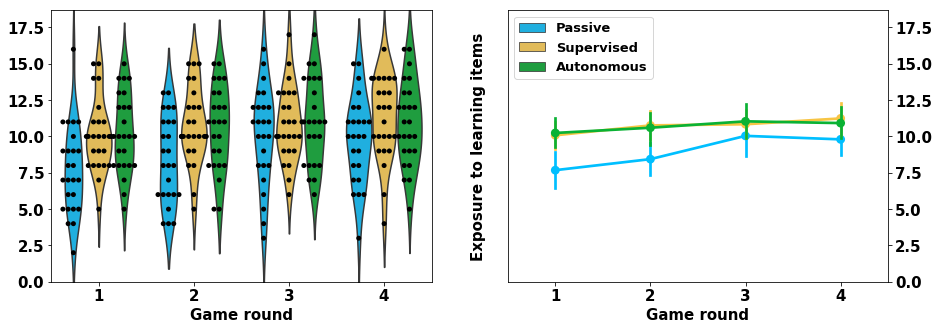

In [337]:
analyse(df,"Game","d_eat","condition","Game round","Exposure to learning items",saving=False)

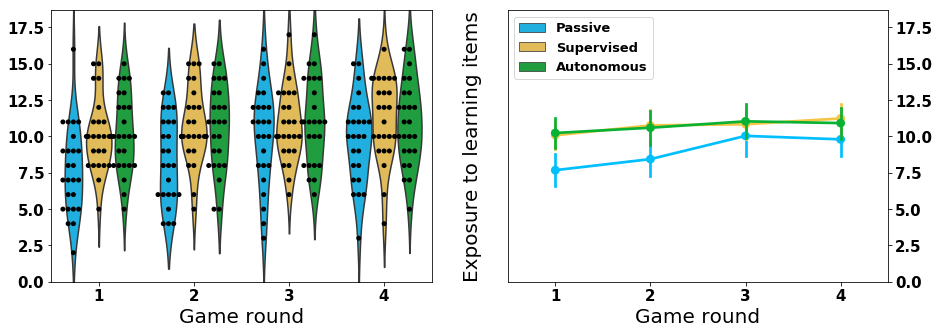

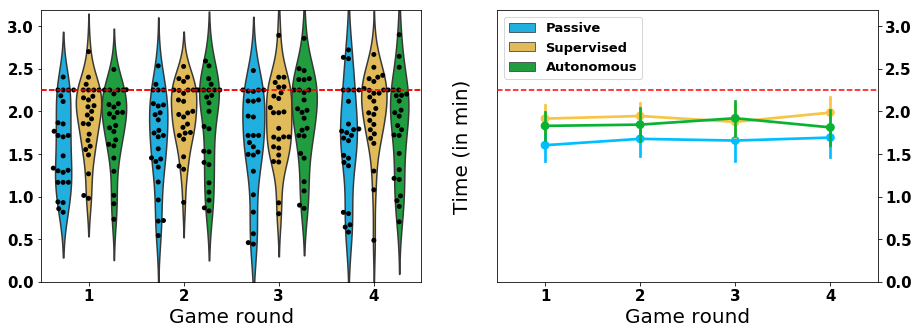

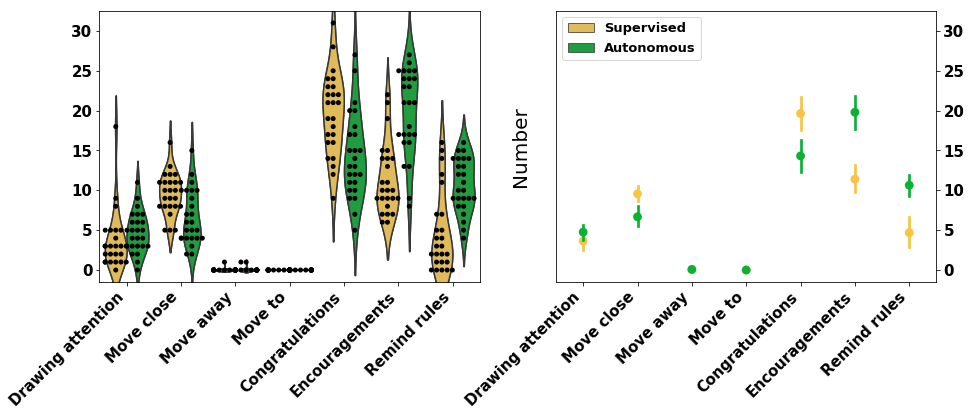

In [339]:
# Graphs
saving=False
sub_frame = df.loc[(df["condition"]=="Supervised") | (df["condition"]=="Autonomous")]
action_categories=["att","mvc","mva", "mvt", "congrats", "encour", "rul"]
action_labels=["Drawing attention","Move close", "Move away", "Move to", "Congratulations", "Encouragements","Remind rules"]

analyse(df,"Game","d_eat","condition","Game round","Exposure to learning items",saving=saving)
saving=True
analyse(df,"Game","time","condition","Game round","Time (in min)", saving=saving,line=2.25)
analyse_actions(sub_frame,action_categories,"condition","","Number",action_labels,saving=saving)

In [340]:
# Tables
sub_frame = df.loc[(df["condition"]=="Supervised") | (df["condition"]=="Autonomous")]
action_categories=["att","mvc","mva", "mvt", "congrats", "encour", "rul"]
action_labels=["Drawing attention","Move close", "Move away", "Move to", "Congratulations", "Encouragements","Remind rules"]

print_table(df,"Game","d_eat","condition","Game round","Exposure to learning items")
print_table(df,"Game","time","condition","Game round","Time")

Exposure to learning items
 & Round 1 & Round 2 & Round 3 & Round 4\\ 
 \midrule 
Passive & 7.7 (3.0) & 8.4 (2.9) & 10.0 (3.3) & 9.8 (3.0)\\ 
Supervised & 10.1 (2.5) & 10.8 (2.6) & 10.8 (2.5) & 11.2 (2.8)\\ 
Autonomous & 10.2 (2.7) & 10.6 (2.9) & 11.0 (2.9) & 10.9 (2.9)\\ 

Time
 & Round 1 & Round 2 & Round 3 & Round 4\\ 
 \midrule 
Passive & 1.6 (0.5) & 1.68 (0.54) & 1.66 (0.6) & 1.69 (0.63)\\ 
Supervised & 1.91 (0.42) & 1.94 (0.39) & 1.88 (0.48) & 1.98 (0.49)\\ 
Autonomous & 1.83 (0.46) & 1.84 (0.55) & 1.92 (0.52) & 1.81 (0.58)\\ 



In [341]:
#Learning gain
cs=["Passive","Supervised","Autonomous"]
for c in cs:
    m=df.loc[df["condition"]==c].learning.mean()
    std=df.loc[df["condition"]==c].learning.std()
    n=1
    if m<2:
        n=2
    s=c+" "+str(round(m,n))
    s+=" ("+str(round(std,n))+")"
    print s

Passive 0.12 (0.14)
Supervised 0.11 (0.13)
Autonomous 0.14 (0.12)


In [342]:
#Demographics
print "Age: "+str(np.mean(df["age"])) +" ("+str(round(np.std(df["age"]),2))+")"
print str(np.sum(df["gender"]=="female"))+"F/"+str(np.sum(df["gender"]=="male"))+"M"

Age: 9.4 (0.71)
37F/38M


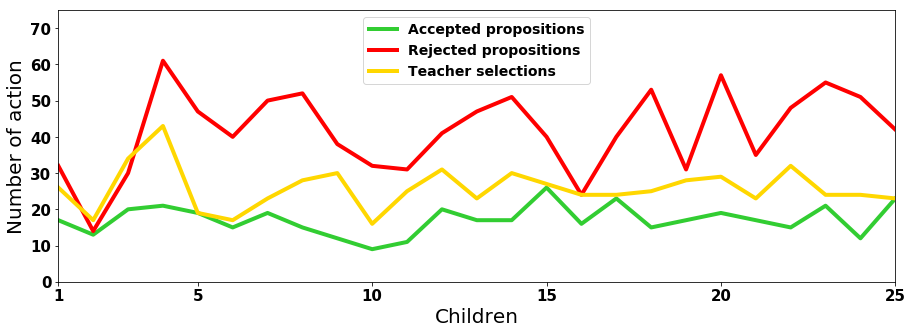

In [343]:
# Supervisor and robot learning

with open("supervisor.json",'r') as f:
    d=json.load(f)
ratio=[]
ratio_accepted=[]
ratio_canceled=[]
good_sug=[]
total_sel=[]
n_proposed=np.zeros(len(d))
n_skip=np.zeros(len(d))
n_press=np.zeros(len(d))
n_autoexe=np.zeros(len(d))
n_enforced=np.zeros(len(d))
n_doit=np.zeros(len(d))
n_select=np.zeros(len(d))
n_reenforced=np.zeros(len(d))
n_cancel=np.zeros(len(d))
n_remove=np.zeros(len(d))

for i, a in enumerate(d):
    n_proposed[i]=len(a["proposed"])
    n_skip[i]=len(a["skip"])
    n_press[i]=len(a["press"])
    n_autoexe[i]=len(a["autoexe"])
    n_enforced[i]=len(a["enforced"])
    n_reenforced[i]=len(a["reenforced"])
    n_doit[i]=len(a["doit"])
    n_select[i]=len(a["select"])
    n_cancel[i]=len(a["cancel"])
    n_remove[i]=len(a["remove"])
    
saving=True
f=plt.figure(figsize=(15,5))
x=np.arange(25)+1
n_good=n_autoexe+n_enforced+n_doit+n_reenforced
n_bad=n_cancel + n_remove + n_skip - n_reenforced
n_teacher = n_select - n_reenforced - n_enforced
n_good_child=np.zeros(len(n_good)/4)
n_bad_child=np.zeros(len(n_bad)/4)
n_teacher_child=np.zeros(len(n_teacher)/4)
for i in range(len(n_good_child)):
    n_good_child[i]=n_good[4*i]+n_good[4*i+1]+n_good[4*i+2]+n_good[4*i+3]
    n_bad_child[i]=n_bad[4*i]+n_bad[4*i+1]+n_bad[4*i+2]+n_bad[4*i+3]
    n_teacher_child[i]=n_teacher[4*i]+n_teacher[4*i+1]+n_teacher[4*i+2]+n_teacher[4*i+3]

plt.plot(x,n_good_child,'limegreen',linewidth=4, label="Accepted propositions")
plt.plot(x,n_bad_child,'r',linewidth=4, label="Rejected propositions")
plt.plot(x,n_teacher_child,'gold',linewidth=4, label="Teacher selections")
plt.ylabel("Number of action",**font)
plt.xlabel("Children",**font)
plt.legend(prop={'size': 14}, loc="upper center")
plt.xticks(list(plt.xticks()[0]) + [1])
plt.xlim(1,25)
plt.ylim(0,75)

if saving:
    f.savefig(path+"summary_supervision.pdf",bbox_inches="tight")
plt.show()

In [344]:
#Mean and standard deviation of actions

print str(round(np.mean(n_good_child),1))+" ("+str(round(np.std(n_good_child),1))+")"
print str(round(np.mean(n_bad_child),1))+" ("+str(round(np.std(n_bad_child),1))+")"
print str(round(np.mean(n_teacher_child),1))+" ("+str(round(np.std(n_teacher_child),1))+")"

g=np.sum(n_good_child)
b=np.sum(n_bad_child)

17.2 (4.0)
41.7 (11.1)
25.8 (5.8)


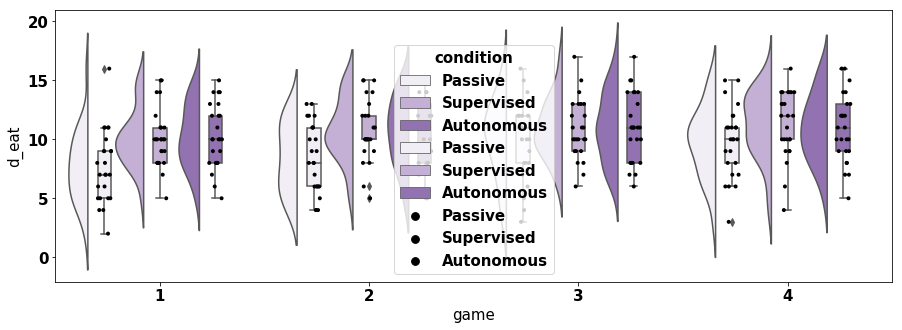

In [11]:
data=df
x="game"
y="d_eat"
hue="condition"
d=expend_frame(data,x,y,hue)

f, (ax) = plt.subplots(1,1, figsize=(15,5))
bplot=sns.boxplot(x=x, y=y, hue=hue, data=d,dodge=True,color=sns.color_palette()[len(set(d[x].tolist()))], width=.2,whis=1.5)

t = matplotlib.transforms.Affine2D().translate(41.5,0)
for i in range(4):
    bplot.artists[3*i].set_transform(bplot.artists[3*i].get_transform() - t)
    bplot.artists[3*i+2].set_transform(bplot.artists[3*i+2].get_transform() + t)
    n=6
    for j in range(n):
        bplot.lines[3*i*n+j].set_transform(bplot.lines[3*i*n+j].get_transform() - t)
        bplot.lines[(3*i+2)*n+j].set_transform(bplot.lines[(3*i+2)*n+j].get_transform() + t)
sw=sns.stripplot(x=x, y=y, hue=hue, data=d,dodge=True, palette=["black", "black","black"],size=4,jitter=True)

pt.half_violinplot(x=x, y=y, data=d, hue=hue, color=sns.color_palette()[len(set(d[x].tolist()))], cut = 2, bw=.5,
                  scale="area", width=.8, inner = None, orient="v", offset=.08)
plt.show()

In [346]:
# Define functions to interpret the csv file and create pandas structures

df=pd.read_csv("df.csv")
path = "../figs/"
saving = False
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)

# Transform the frame from csv to the format used by seaborn
def expend_frame(data,x,y,hue):
    col = [l for l in list(data) if y in l]
    d={x:[],y:[],hue:[]}
    for i,c in enumerate(col):
        d[x]=d[x]+ [str(i+1)] * len(data)
        d[y]=d[y]+data[c].tolist()
        d[hue]=d[hue]+data[hue].tolist()
    return pd.DataFrame(d)

# Print latex tables
def print_table(di,x,y,hue,xlabel, ylabel,col_labels=None,cat=None):
    if col_labels is None:
        d=expend_frame(di,x,y,hue)
    else:
        d={x:[],y:[],hue:[]}
        for i,c in enumerate(cat):
            d[x]=d[x]+ [c] * len(di)
            d[y]=d[y]+di[c].tolist()
            d[hue]=d[hue]+di[hue].tolist()
        d=pd.DataFrame(d)
        
    print(ylabel)
    col= d[x].unique()
    rows=d[hue].unique()
    
    s=""
    if col_labels is None:
        for i in col:
            s+=" & "+(xlabel.split(" ")[-1]).capitalize() + " "+i
    else:
        for i in col_labels:
            s+=" & "+i
    s+="\\\\ \n \midrule \n"

    for r in rows:
        s+=r
        for i in col:
            m=d.loc[(d[x]==i) & (d[hue]==r)][y].mean()
            std=d.loc[(d[x]==i) & (d[hue]==r)][y].std()
            n=1
            if m<2:
                n=2
            s+=" & "+str(round(m,n))
            s+=" ("+str(round(std,n))+")"
        s+="\\\\ \n"

    print(s)
    
# violin plot and point plots
def plot(d,x,y,hue,xlabel,ylabel,palette=["deepskyblue", "#F7C544", "#0AB234"],legend=True,saving=False):
    #f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(15,5))

    #sns.violinplot(x=x, y=y, hue=hue, data=d, split=False, inner=None, palette=palette,ax=ax1)
    #sns.swarmplot(x=x, y=y, hue=hue, data=d, dodge=True, palette=["black", "black","black"],ax=ax1)
    sns.stripplot(x=x, y=y, hue=hue, data=d, dodge=True,palette=palette,ax=ax1)
    sns.boxplot(x=x, y=y, hue=hue, data=d, dodge=True,palette=["black", "black","black"],ax=ax1,
               boxprops = {'facecolor':'none', "zorder":10}, showcaps = True, showfliers=True)
    
    pt.half_violinplot(x=x, y=y, hue=hue, data=d, palette=palette, cut = 0.,
                      scale="area", inner = None, orient="v", ax=ax1)
    #pt.half_violinplot(x=x, y=y, hue=hue, data=d, palette=palette, cut = 0.,
    #                  scale="area", width=.6, inner = None, orient="v", ax=ax1)
    #sns.stripplot( x = x, y = y, hue=hue, data=d, palette=palette, edgecolor = "white",
    #             size = 15, jitter = 1, zorder = 0, orient = "v", ax=ax1)
    #sns.boxplot( x = x, y = y, hue=hue, data = d, dodge=True, color = "black", width = .15, zorder = 10,\
    #        showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
    #        showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
    #           saturation = 1, orient = "v", ax=ax1)
    ma=max(d[y].values)
    mi=min(d[y].values)
    if mi > 0 and mi < .2*ma:
        ax1.set_ylim(0,1.1*ma)
    #    ax2.set_ylim(0,1.1*ma)
    else:
        ax1.set_ylim(mi-.05*ma,1.05*ma)
    #    ax2.set_ylim(mi-.05*ma,1.05*ma)
    
    ax1.set_xlabel(xlabel, **font)
    ax1.set_ylabel("", **font)
    #sns.pointplot(x=x, y=y, hue=hue, data=d, palette=palette,ax=ax2)
    #ax2.set_xlabel(xlabel, **font)
    #ax2.set_ylabel(ylabel+"\n", **font)
    #ax2.yaxis.tick_right()
    
    if legend:
        handles1, labels1 = ax1.get_legend_handles_labels()
    #    handles2, labels2 = ax2.get_legend_handles_labels()
    #    l = ax2.legend(handles1[0:3], labels2[0:3], loc='upper left',prop={'size': 13})
        ax1.legend_.remove()
    if saving:
        f.savefig(path+y+".pdf",bbox_inches="tight")
    plt.show()    

def analyse(data,x,y,hue,xlabel,ylabel,palette=["deepskyblue", "#F7C544", "#0AB234"],legend=True,saving=False):
    d=expend_frame(data,x,y,hue)
    plot(d,x,y,hue,xlabel,ylabel,palette,legend,saving)
    
def analyse_actions(data,cat,hue,xlabel,ylabel,action_labels,palette=["#F7C544", "#0AB234"],legend=True,saving=False):
    x="action"
    y="number"
    d={x:[],y:[],hue:[]}
    for i,c in enumerate(cat):
        d[x]=d[x]+ [c] * len(data)
        d[y]=d[y]+data[c].tolist()
        d[hue]=d[hue]+data[hue].tolist()
    d=pd.DataFrame(d)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    sns.violinplot(x=x, y=y, hue=hue, data=d, split=False, inner=None, palette=palette,ax=ax1)
    sns.swarmplot(x=x, y=y, hue=hue, data=d, dodge=True, palette=["black", "black","black"],ax=ax1)
    ma=max(d[y].values)
    mi=min(d[y].values)
    if mi > 0 and mi < .2*ma:
        ax1.set_ylim(0,1.1*ma)
        ax2.set_ylim(0,1.1*ma)
    else:
        ax1.set_ylim(mi-.05*ma,1.05*ma)
        ax2.set_ylim(mi-.05*ma,1.05*ma)
    
    ax1.set_xlabel(xlabel, **font)
    ax1.set_ylabel("", **font)
    sns.pointplot(x=x, y=y, hue=hue, data=d, palette=palette,ax=ax2, join=False)
    
    ax2.set_xlabel(xlabel, **font)
    ax2.set_ylabel(ylabel+"\n", **font)
    ax2.yaxis.tick_right()
    
    plt.sca(ax1)
    locs, labels = plt.xticks()
    plt.xticks(locs, action_labels, rotation=45, ha='right')
    plt.sca(ax2)
    plt.xticks(locs, action_labels, rotation=45,ha='right')
    
    if legend:
        handles1, labels1 = ax1.get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()
        l = ax2.legend(handles1[0:3], labels2[0:3], loc='upper left',prop={'size': 13})
        ax1.legend_.remove()
    if saving:
        f.savefig(path+"actions.pdf",bbox_inches="tight")
    plt.show()   

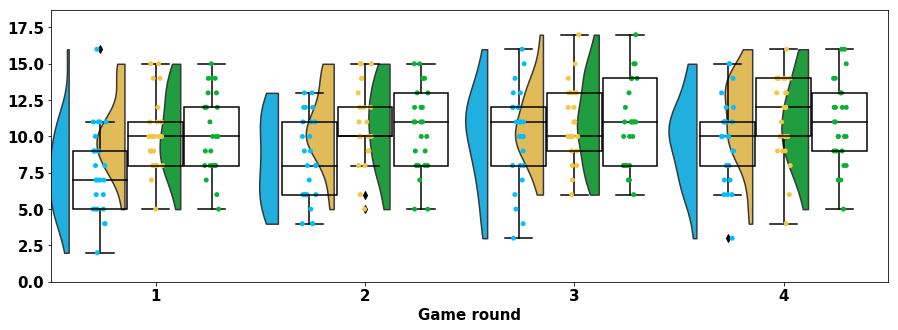

In [347]:
analyse(df,"Game","d_eat","condition","Game round","Exposure to learning items",saving=False)

In [3]:
action_id =["att","mvc","mva","mvt","congrats","encour","rul"]

with open('sup_event.csv') as f:
    l=[]
    r = csv.reader(f, delimiter=";")
    for row in r:
        l.append(row)
    sup_event=[]
    for r_num,row in enumerate(l):
        for i in range(25):
            for j in range(4):
                c=[row[2*(4*i+j)],row[2*(4*i+j)+1]]
                if r_num==0:
                    if j==0:
                        sup_event.append([[c]])
                    else:
                        sup_event[i].append([c])
                else:
                    if c != ["",""]:
                        sup_event[i][j].append(c)
    
with open('aut_event.csv') as f:
    l=[]
    r = csv.reader(f, delimiter=";")
    for row in r:
        l.append(row)
    aut_event=[]
    count=0
    for r_num,row in enumerate(l):
        for i in range(25):
            for j in range(4):
                c=[row[2*(4*i+j)],row[2*(4*i+j)+1]]
                if c[1]=="congrats":
                    count+=1
                if r_num==0:
                    if j==0:
                        aut_event.append([[c]])
                    else:
                        aut_event[i].append([c])
                else:
                    if c != ["",""]:
                        aut_event[i][j].append(c)

In [6]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 17}
saving = False
def get_time_between(data, ev1, ev2):    
    t=0
    ts=[]
    for c in data:
        for r in c:
            t=None
            for event in r:
                if event[1].startswith(ev2) and t is not None:
                    ts.append(float(event[0])-float(t))    
                if event[1].startswith(ev1):
                    t=event[0]
    return ts
def plot_time(ev1,ev2):
    plt.rc('font', **font)
    f1, (ax1) = plt.subplots(1, 1, figsize=(5,4.6))
    f2, (ax2) = plt.subplots(1, 1, figsize=(5,4.4))
    t1=get_time_between(sup_event,ev1,ev2)
    t2=get_time_between(aut_event,ev1,ev2)
    m=max(max(t1),max(t2))
    sns.swarmplot(t1,ax=ax1,palette=["black"])
    sns.violinplot(t1,ax=ax1, palette=["#F7C544"])
    ax1.set_xlabel("Time since eating event for \n each congratulation action (s)", **font)
    ax1.xaxis.set_tick_params(labeltop="on")
    ax1.xaxis.set_label_position('top')
    ax1.xaxis.set_tick_params(labelbottom="off")
    ax1.set_xlim(-m/100.,1.1*m)
    ax1.set_ylim(-0.5,0.5)
    sns.swarmplot(t2,ax=ax2,palette=["black"])
    sns.violinplot(t2,ax=ax2, palette=["deepskyblue"])
    ax2.set_xlim(-m/100,1.1*m)
    ax2.set_ylim(-0.5,0.5)
    ax2.xaxis.set_tick_params(labeltop="on")
    ax2.xaxis.set_tick_params(labelbottom="off")
    plt.show()  
    
    if saving:
        f1.savefig("./figs/compa_time_sup.pdf",bbox_inches="tight")
        f2.savefig("./figs/compa_time_aut.pdf",bbox_inches="tight")
        

In [113]:
data=sup_event
ev1="cong"
ev2="cong"
t=0
for i,c in enumerate(data):
    for j,r in enumerate(c):
        t=None
        for event in r:
            if event[1].startswith(ev2) and t is not None:
                if float(event[0])-float(t)<3:
                    print 4*i+j
                    print event[0]
            if event[1].startswith(ev1):
                t=event[0]

7
30.11216123
13
58.738655359
14
37.325770871
14
45.381514701
18
62.389654003
18
86.289264785
18
88.106404591
18
90.241136399
18
95.424195562
20
8.202224062
30
33.711702817
33
124.080978447
54
48.054214064
60
67.099297696
64
48.203475934
71
49.675293067
74
21.301429663


In [27]:
def get_frame(event_list):
    d_e={"type":[],"time":[],"condition":[]}
    for i in event_list:
        t1=get_time_between(sup_event,i[0],i[1])
        t2=get_time_between(aut_event,i[0],i[1])

        for t in t1:
            d_e["type"].append(i[0]+"_"+i[1])
            d_e["time"].append(t)
            d_e["condition"].append("Supervised")
        for t in t2:
            d_e["type"].append(i[0]+"_"+i[1])
            d_e["time"].append(t)
            d_e["condition"].append("Autonomous")

    return pd.DataFrame(d_e)

In [116]:
def fancy_plot(data):
    x="type"
    hue="condition"
    y="time"
    palette=[ "#F7C544", "#0AB234"]
    sns.stripplot(x=x, y=y, hue=hue, data=data,dodge=True,palette=palette, jitter=True,zorder=-1)
    bplot=sns.boxplot(x=x, y=y, hue=hue, data=data,dodge=True,palette=palette,linewidth=3,
                      width=.24,whis=1.5,zorder=5,boxprops={'facecolor':'None'}, fliersize=0)
    t = matplotlib.transforms.Affine2D().translate(31,0)
    for i in range(5):
        bplot.artists[2*i].set_transform(bplot.artists[2*i].get_transform() - t)
        bplot.artists[2*i+1].set_transform(bplot.artists[2*i+1].get_transform() + t)
        n=6
        for j in range(n):
            bplot.lines[2*i*n+j].set_transform(bplot.lines[2*i*n+j].get_transform() - t)
            bplot.lines[(2*i+1)*n+j].set_transform(bplot.lines[(2*i+1)*n+j].get_transform() + t)
    pt.half_violinplot(x=x, y=y, data=data, hue=hue, palette=palette, cut = 2, bw=.5,
                      scale="area", width=.8, inner = None, orient="v", offset=.08)
    #plt.ylim([0,20])
    plt.show()

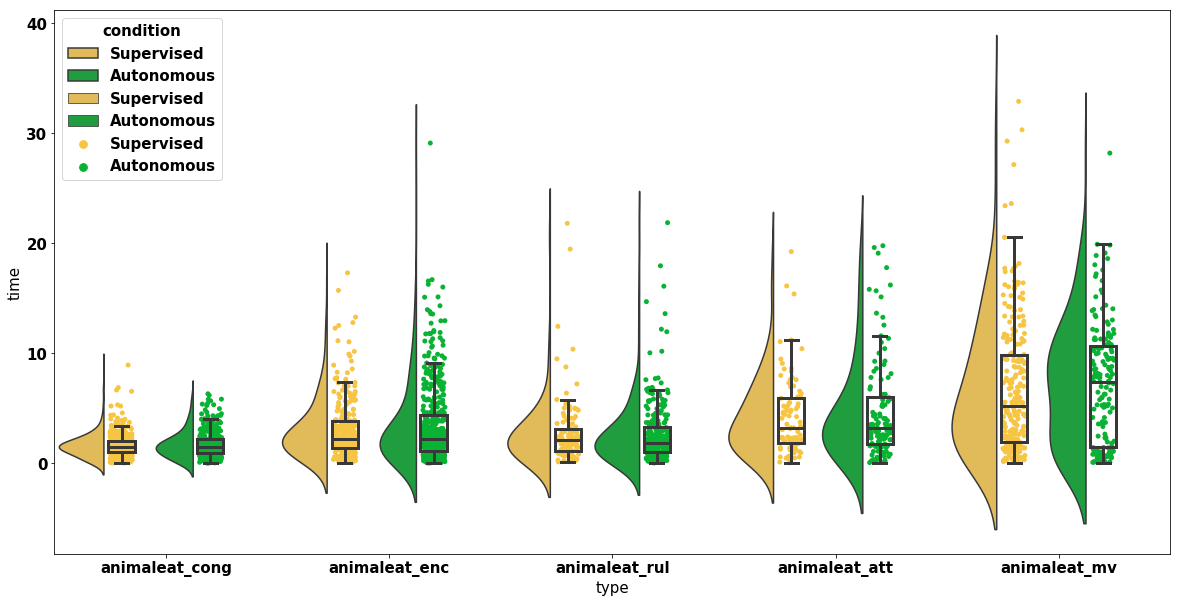

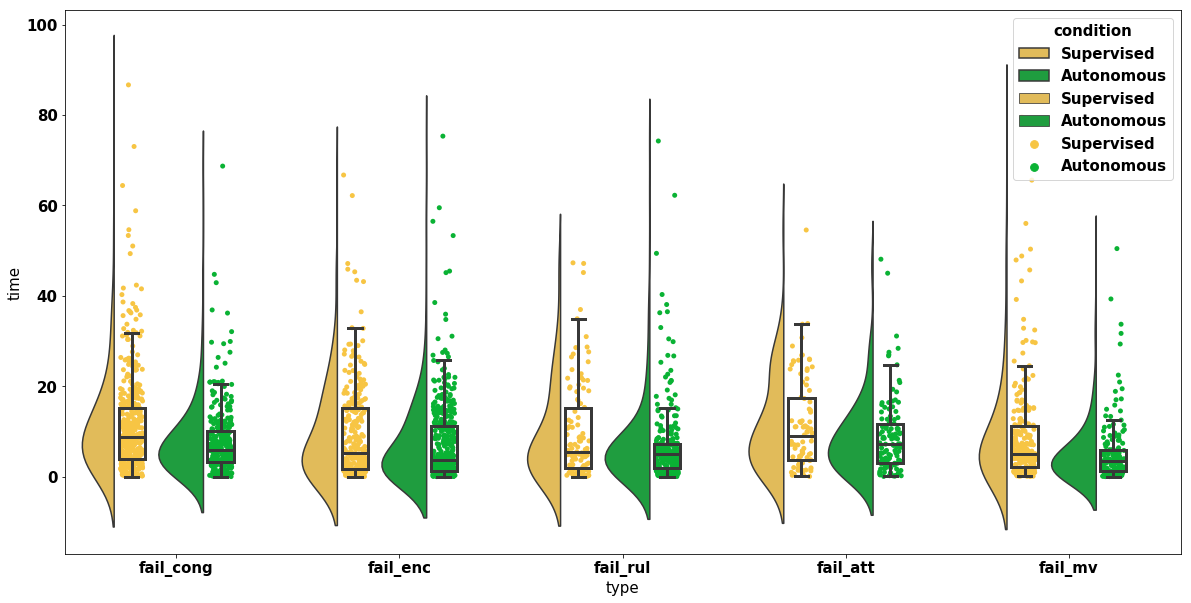

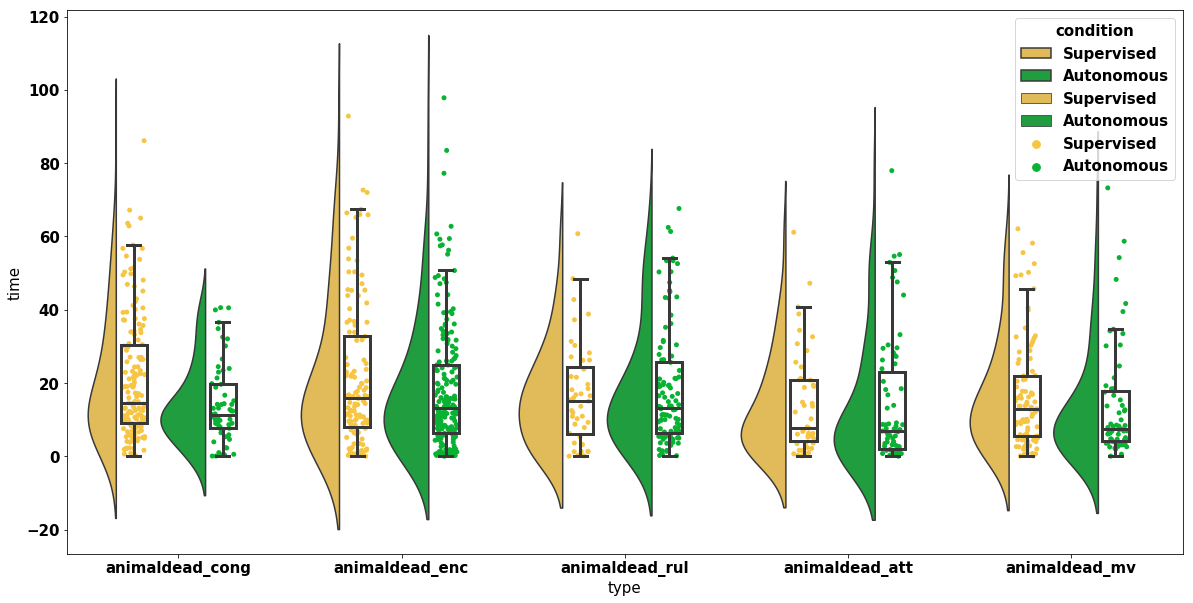

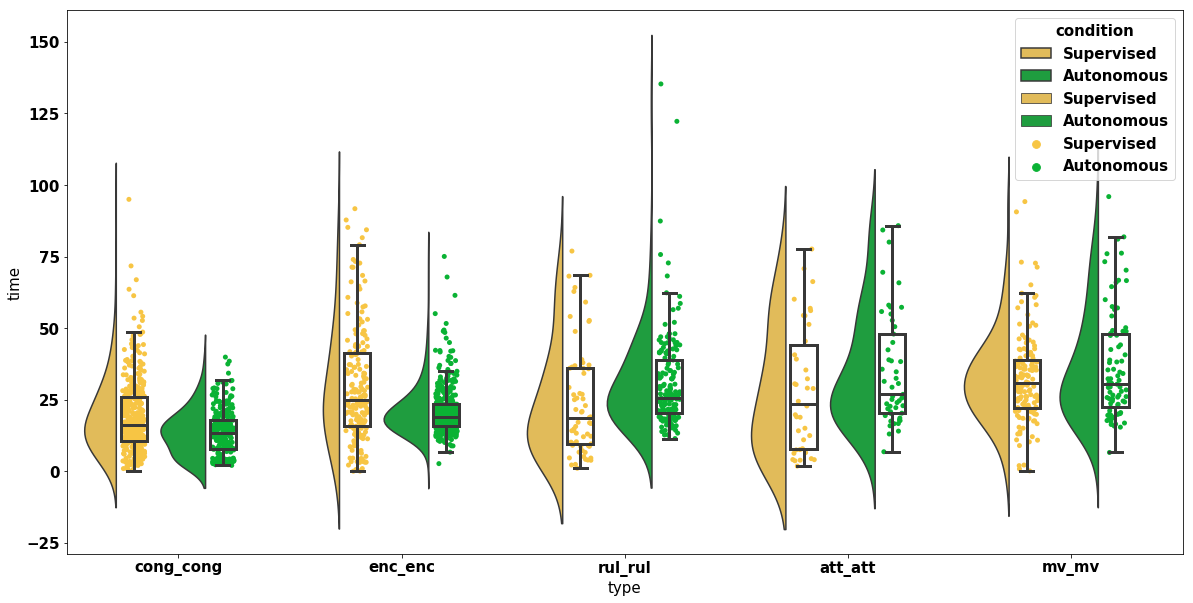

In [117]:
events=["animaleat","fail","animaldead"]
actions=["cong","enc","rul","att","mv"]
for ev in events:
    fancy_plot(get_frame([[ev,a] for a in actions]))

fancy_plot(get_frame([[a,a] for a in actions]))

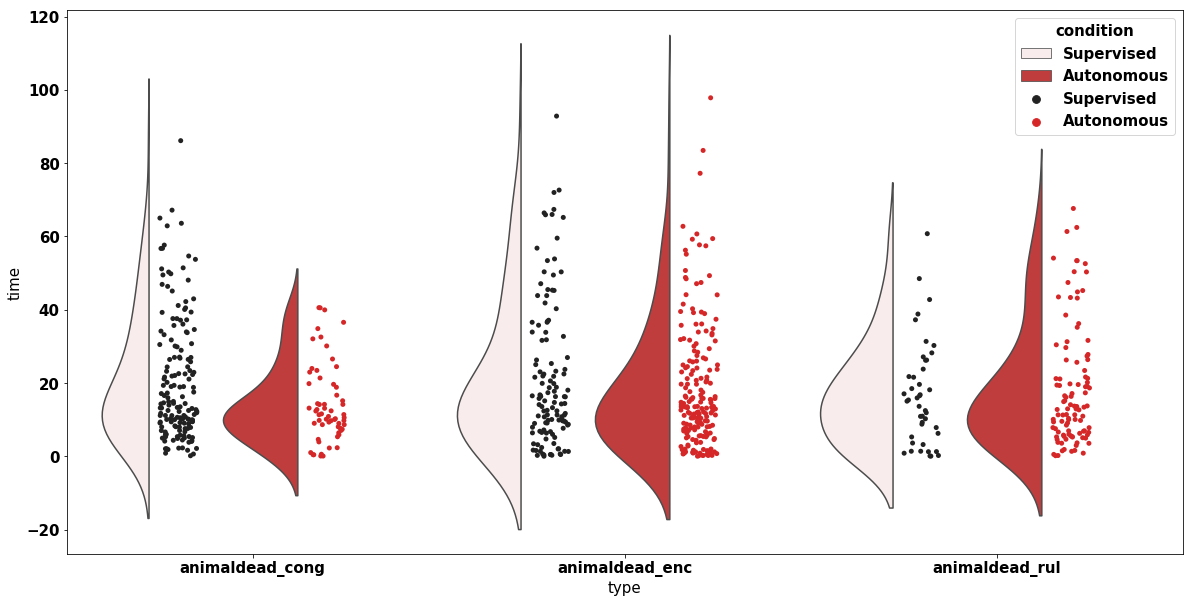

In [48]:
fancy_plot(get_frame([["animaldead","cong"],["animaldead","enc"],["animaldead","rul"]]))

/home/senft/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/senft/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


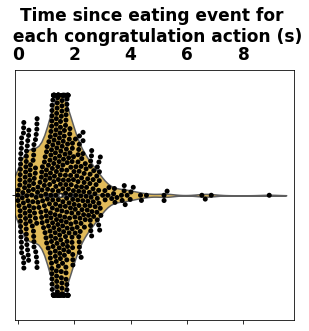

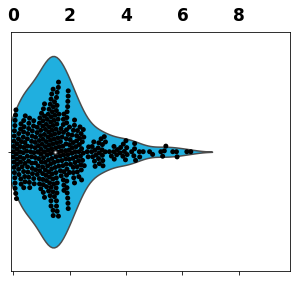

In [7]:
plot_time("animaleat","cong")